In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
48,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060,0
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,0
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,1
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,0
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,2
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,0
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1


In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Paso 1: Carga de Datos y Preparación

In [4]:
data = pd.read_csv('dataWine/wine.csv')
print(data.head())

   Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23        1.71  2.43        15.6        127     2.80        3.06   
1    13.20        1.78  2.14        11.2        100     2.65        2.76   
2    13.16        2.36  2.67        18.6        101     2.80        3.24   
3    14.37        1.95  2.50        16.8        113     3.85        3.49   
4    13.24        2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color_intensity   Hue  \
0           0.28             2.29             5.64  1.04   
1           0.26             1.28             4.38  1.05   
2           0.30             2.81             5.68  1.03   
3           0.24             2.18             7.80  0.86   
4           0.39             1.82             4.32  1.04   

   OD280_315_of_diluted_wines  Proline  WineVariety  
0                        3.92     1065            0  
1                        3.40     1050            0  
2                   

# Paso 2: Análisis Exploratorio de Datos

In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

# Paso 3: Limpieza y Preprocesamiento de Datos

In [7]:
data = data.dropna()
X = data.drop('WineVariety', axis=1)
y = data['WineVariety']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: División de Datos en Conjuntos de Entrenamiento y Prueba

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del Modelo de Clasificación (SVM lineal en este caso)

In [9]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# Paso 6: Evaluación del Modelo

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns




# Histogramas de las características

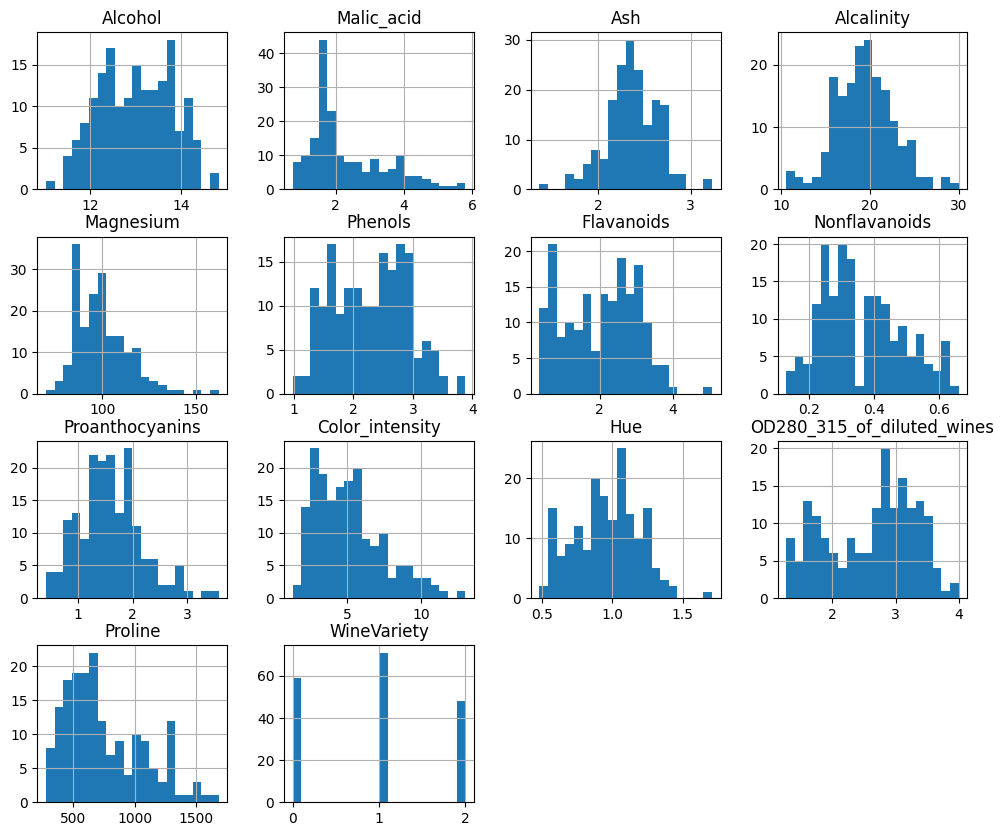

In [13]:
data.hist(bins=20, figsize=(12, 10))
plt.show()

# Gráfico de correlación entre características

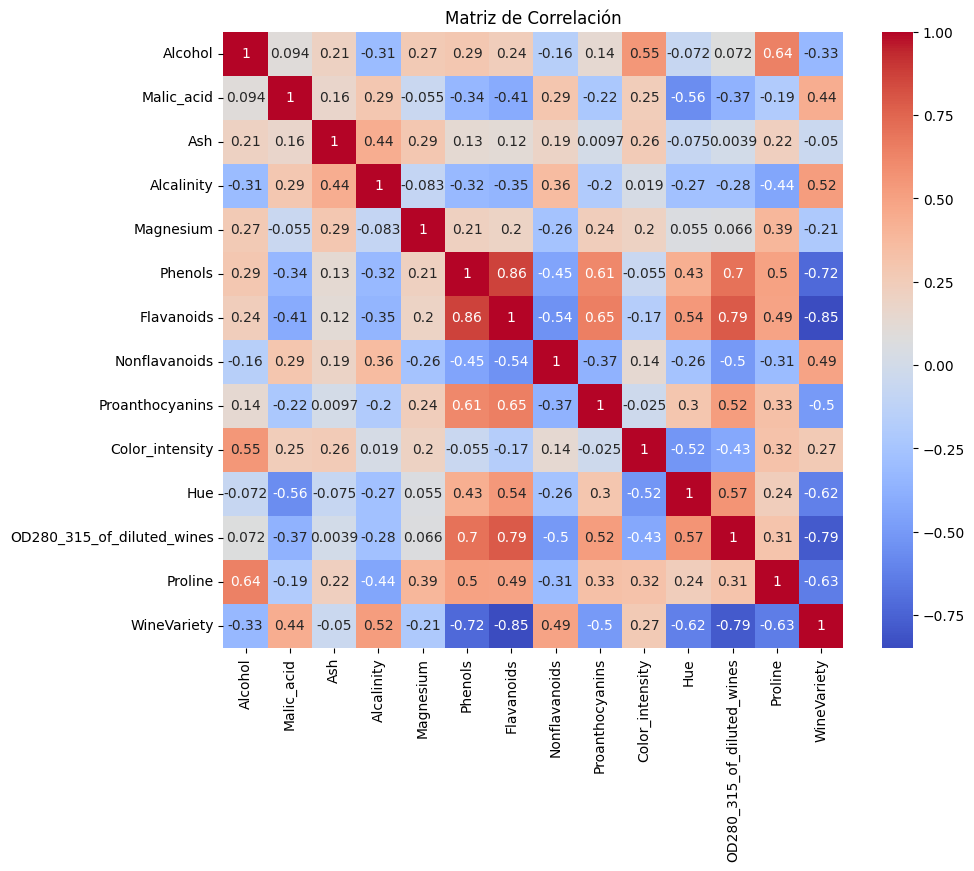

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Matriz de confusión

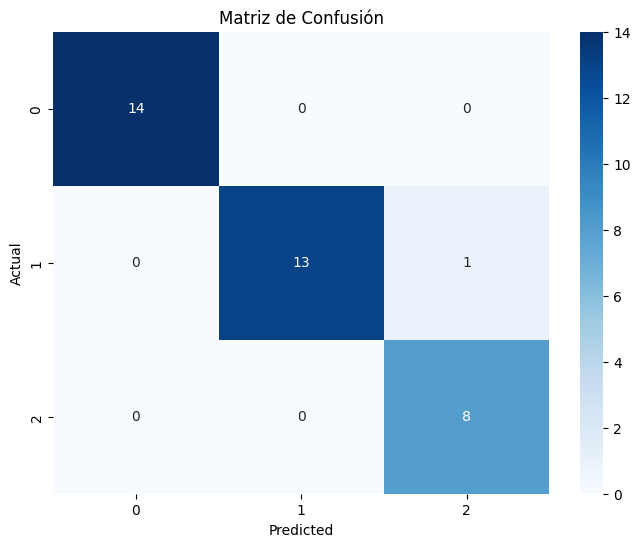

In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Gráfico de barras para mostrar la distribución de clases reales y predichas

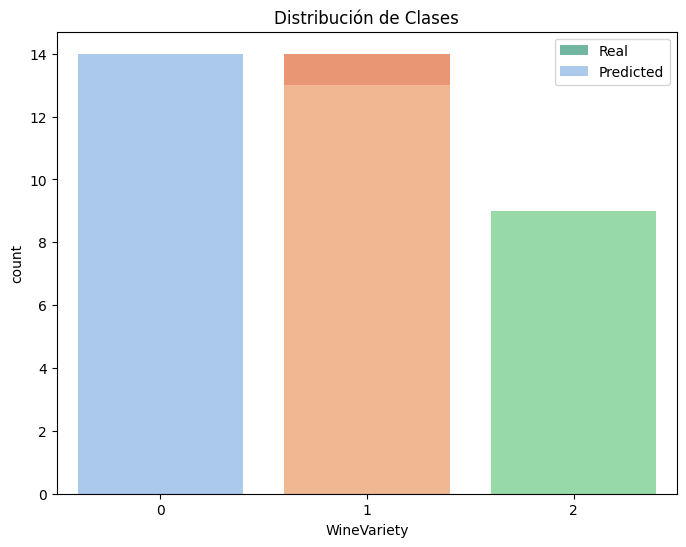

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette="Set2", label="Real")
sns.countplot(x=y_pred, palette="pastel", label="Predicted")
plt.legend()
plt.title("Distribución de Clases")
plt.show()